# Learn to use Auto-Sklearn

In [1]:
# print autosklearn version
import autosklearn
print('autosklearn: %s' % autosklearn.__version__)

autosklearn: 0.11.1


## Classification Model
The following example shows how to fit a simple classification model with auto-sklearn.

In [1]:
import sklearn.datasets
import sklearn.metrics
import autosklearn.classification

/Users/amanda/opt/anaconda3/lib/python3.7/site-packages/pyparsing.py:3174: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


### 1. Data Loading

In [2]:
# Load a example dataset
X, Y = sklearn.datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, random_state=1)

### 2. Build and fit a classifaction

In [6]:
# Create Classification model
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=120,
                                                          per_run_time_limit=30,
                                                          tmp_folder='../tmp/autosklearn_classification_example_tmp',
                                                          output_folder='../output/autosklearn_classification_example_out')
# Train model
automl.fit(X_train, Y_train, dataset_name='breast_cancer')

/Users/amanda/opt/anaconda3/lib/python3.7/site-packages/distributed/dashboard/core.py:79: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)
/Users/amanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


AutoSklearnClassifier(dask_client=None,
                      delete_output_folder_after_terminate=True,
                      delete_tmp_folder_after_terminate=True,
                      disable_evaluator_output=False, ensemble_nbest=50,
                      ensemble_size=50, exclude_estimators=None,
                      exclude_preprocessors=None, get_smac_object_callback=None,
                      include_estimators=None, include_preprocessors=None,
                      initial_configurations_via_metal...
                      max_models_on_disc=50, memory_limit=3072,
                      metadata_directory=None, metric=None, n_jobs=None,
                      output_folder='../output/autosklearn_classification_example_out',
                      per_run_time_limit=30, resampling_strategy='holdout',
                      resampling_strategy_arguments=None, seed=1,
                      smac_scenario_args=None, time_left_for_this_task=120,
                      tmp_folder='../t

### 3. Print the final ensemble constructed by auto-sklearn

In [7]:
print('\n\n--- MODELS: ---')
print(automl.show_models())



--- MODELS: ---
[(0.100000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'gradient_boosting', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'quantile_transformer', 'feature_preprocessor:__choice__': 'polynomial', 'classifier:gradient_boosting:early_stop': 'valid', 'classifier:gradient_boosting:l2_regularization': 8.495727973549814e-08, 'classifier:gradient_boosting:learning_rate': 0.10895774269386836, 'classifier:gradient_boosting:loss': 'auto', 'classifier:gradient_boosting:max_bins': 255, 'classifier:gradient_boosting:max_depth': 'None', 'classifier:gradient_boosting:max_leaf_nodes': 6, 'classifier:gradient_boosting:min_samples_leaf': 17, 'classifier:grad

### 4. Predict and get the Score of the final ensemble
In a Classifcation model the appropriate statistics to check how good is out model is the accuracy score.

In [8]:
predictions = automl.predict(X_test)
print("Accuracy score:", sklearn.metrics.accuracy_score(Y_test, predictions))

Accuracy score: 0.958041958041958


### 5. Visualization Data

(array([51.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 92.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

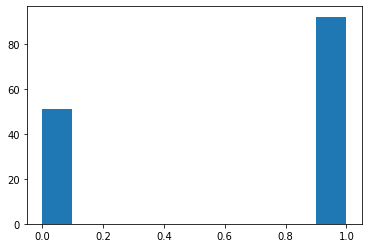

In [32]:
import matplotlib.pyplot as plt

plt.hist(predictions)

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[50  5]
 [ 1 87]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        55
           1       0.95      0.99      0.97        88

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143

